<a href="https://colab.research.google.com/github/leonlpz/Reconocimiento_de_Patrones/blob/main/GuiaTrabajoRedesNeuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Guía de trabajo redes neuronales.

Para esta actividad deben construir una red neuronal como las vistas en clase (no se aceptan otros tipos de redes como las convolucionales o recurrentes). Para esta red neuronal deben realizar una búsqueda de hiperparámetros de tal forma que se maximice el rendimiento del modelo en el conjunto de prueba. Para la búsqueda de hiperparámetros, se recomienda usar la búsqueda aleatoria.

## Etapa 1: Carga de los datos.

Antes de comenzar a definir la red neuronal, cargamos la base de datos de interés. Para esta actividad, usaremos la base de datos Fashion-MNIST, la cual consiste en identificar tipos de prendas de vestir https://keras.io/api/datasets/fashion_mnist/. Esta base de datos configura un problema de 10 clases.

In [ ]:
!pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.9 MB/s eta 0:00:00


Se cargan las librerías necesarias

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import plot_model

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from keras_tuner import RandomSearch

Se carga la base de datos y se divide en los conjunto de entrenamiento y prueba. Hay 60000 imágenes para el entrenamiento y 10000 en el conjunto de prueba.

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
#division del entrenamiento en validacion
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1)

In [ ]:
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(54000, 28, 28) (54000,) (6000, 28, 28) (6000,)


Las imágenes tienen tamaño 28x28. A continuación de muestran algunos ejemplos.


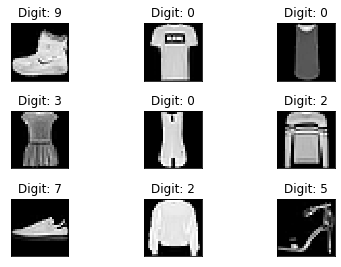

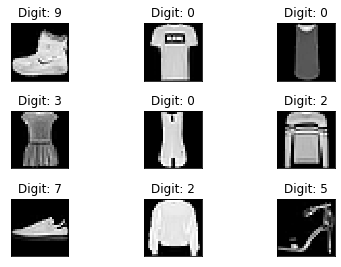

In [ ]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [ ]:
d1, d2, d3 = x_train.shape
x_train_flat = x_train.reshape((d1, d2*d3))/255
d1, d2, d3 = x_test.shape
x_test_flat = x_test.reshape((d1, d2*d3))/255
d1, d2, d3 = x_val.shape
x_val_flat = x_val.reshape((d1, d2 * d3)) / 255

print(x_train_flat.shape, x_test_flat.shape, x_val_flat.shape)

(54000, 784) (10000, 784) (6000, 784)


In [ ]:
# Número de épocas para los experimentos
epochs = 10

In [ ]:
def build_model_1(hp):
  model = Sequential()
  for i in range(hp.Int('num_layers', 1, 4, 1)): # range(2)
    model.add(Dense(units = hp.Choice('units'+str(i+1), [250, 550]), activation = hp.Choice('activation'+str(i+1), ['relu', 'sigmoid'])))
  model.add(Dense(10, activation = 'softmax'))
  optimizer = tf.keras.optimizers.Adam(hp.Choice('learning_rate', [0.01, 0.001]))
  model.compile(loss='sparse_categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
  return model

In [ ]:
tuner_1 = RandomSearch(build_model_1, objective = 'val_loss', max_trials = 10, overwrite=True)
tuner_1.search(x_train_flat, y_train, epochs = epochs, validation_data = (x_val_flat, y_val), verbose=2)
best_model_1 = tuner_1.get_best_models()[0]

Trial 7 Complete [00h 01m 13s]
val_loss: 0.4048173129558563

Best val_loss So Far: 0.27769097685813904
Total elapsed time: 00h 20m 05s

Search: Running Trial #8

Value             |Best Value So Far |Hyperparameter
2                 |1                 |num_layers
250               |550               |units1
sigmoid           |relu              |activation1
0.01              |0.001             |learning_rate
550               |250               |units2
sigmoid           |sigmoid           |activation2
250               |550               |units3
relu              |relu              |activation3

Epoch 1/10
1688/1688 - 12s - 7ms/step - accuracy: 0.7837 - loss: 0.5889 - val_accuracy: 0.8137 - val_loss: 0.5258
Epoch 2/10
1688/1688 - 19s - 11ms/step - accuracy: 0.8228 - loss: 0.4943 - val_accuracy: 0.8217 - val_loss: 0.4937
Epoch 3/10
1688/1688 - 10s - 6ms/step - accuracy: 0.8178 - loss: 0.5081 - val_accuracy: 0.8058 - val_loss: 0.5179
Epoch 4/10
1688/1688 - 11s - 6ms/step - accuracy: 0.825

KeyboardInterrupt: 

In [ ]:
print(best_model_1.layers[0].units)
print(best_model_1.layers[0].activation, best_model_1.layers[1].activation)
print(best_model_1.optimizer.learning_rate)

In [ ]:
test_loss, test_acc = best_model_1.evaluate(x_test_flat, y_test)
print('test_acc:', test_acc)